<a href="https://colab.research.google.com/github/ahmed-gharib89/TensorFlow_2_for_Deep_Learning/blob/master/Customising%20your%20models%20with%20TensorFlow%202/week3/Coding_Tutorial_The_IMDB_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

2.3.0
GPU name: /device:GPU:0


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [3]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

17465344/17464789 [==============================] - 0s 0us/step


#### Inspect the dataset

In [4]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [5]:
# Inspect the shape of the data

print(f'Training data shape: {x_train.shape}\n\
Training labels shape: {y_train.shape}\n\
Test data shape: {x_test.shape}\n\
Test labels shape: {y_test.shape}')

Training data shape: (25000,)
Training labels shape: (25000,)
Test data shape: (25000,)
Test labels shape: (25000,)


In [6]:
# Display the first dataset element input
# Notice encoding

x_train[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 22665,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 21631,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 19193,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 31050,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5

In [7]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [ ]:
# Load the dataset with defaults

imdb.load_data(path='imdb.npz')
# ~/.keras/dataset/

In [ ]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=500)

In [ ]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10, oov_char=2, index_from=3)

In [ ]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

In [ ]:
 # Use '1' as the character that indicates the start of a sequence

 imdb.load_data(start_char=1)

#### Explore the dataset word index

In [9]:
# Load the imdb word index using get_word_index()

imdb_word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [10]:
# View the word index as a dictionary,
# accounting for index_from.

index_from = 3
imdb_word_index = {key: value + index_from for key, value in imdb_word_index.items()}

In [11]:
# Retrieve a specific word's index

imdb_word_index['simpsonian']

52256

In [12]:
imdb_word_index['the']

4

In [13]:
# View an input sentence

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}
' '.join([inv_imdb_word_index[index] for index in x_train[0] if index > index_from])

"this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be 

In [14]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [15]:
# Load the imdb data set

(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Preprocess the data with padding

In [16]:
# Inspect the input data shape

print(f'Training data shape: {x_train.shape}\n\
Training labels shape: {y_train.shape}\n\
Test data shape: {x_test.shape}\n\
Test labels shape: {y_test.shape}')

Training data shape: (25000,)
Training labels shape: (25000,)
Test data shape: (25000,)
Test labels shape: (25000,)


In [17]:
# Pad the inputs to the maximum length using maxlen

padded_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                              maxlen=300,
                                                              padding='post',
                                                              truncating='pre')

In [18]:
# Inspect the output data shape

print(f'Training data shape: {padded_x_train.shape}')

Training data shape: (25000, 300)


#### Create a Masking layer

In [19]:
# Import numpy 

import numpy as np

In [20]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

padded_x_train = np.expand_dims(padded_x_train, -1)

In [21]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(padded_x_train, dtype='float32')
masking_layer = tf.keras.layers.Masking(mask_value=0.0)

In [22]:
# Pass tf_x_train to it

masked_x_train = masking_layer(tf_x_train)

In [23]:
# Look at the dataset

masked_x_train

<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
array([[[1.000e+00],
        [1.400e+01],
        [2.200e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.940e+02],
        [1.153e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.400e+01],
        [4.700e+01],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       ...,

       [[1.000e+00],
        [1.100e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.446e+03],
        [7.079e+03],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]],

       [[1.000e+00],
        [1.700e+01],
        [6.000e+00],
        ...,
        [0.000e+00],
        [0.000e+00],
        [0.000e+00]]], dtype=float32)>

In [24]:
# Look at the ._keras_mask for the dataset

masked_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [25]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

embedding_layer = tf.keras.layers.Embedding(input_dim=501,
                                            output_dim=16)

In [26]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

sequence_of_indices = tf.constant([[[0], [1], [5], [500]]])
sequence_of_embeddings = embedding_layer(sequence_of_indices)
sequence_of_embeddings

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[ 0.03733504,  0.00682852, -0.0309237 ,  0.01392378,
           0.02832803,  0.04621977, -0.04067295,  0.03755814,
          -0.04507914, -0.02143471, -0.03087993, -0.01271546,
           0.03975636, -0.00889285,  0.01052817,  0.00803428]],

        [[ 0.03304761, -0.00167718,  0.00331441, -0.04684422,
          -0.03839951,  0.0162627 , -0.00310384,  0.00305741,
           0.0091467 , -0.03655294, -0.02765604,  0.04299315,
           0.03678331, -0.02894467, -0.00359669, -0.02012985]],

        [[-0.03693807,  0.00501513,  0.01609626,  0.03737799,
           0.02254435,  0.02134873,  0.03484428,  0.0166119 ,
           0.00894175, -0.02285134,  0.01590121, -0.0228462 ,
           0.03280362, -0.02604613, -0.00036101, -0.00796241]],

        [[-0.0266526 ,  0.02138707,  0.01621472, -0.04618964,
          -0.04649545,  0.03884618,  0.02096247, -0.03988445,
          -0.00539149,  0.0145187 , -0.03973588,  0.0176939 ,
      

In [28]:
# Inspect the Embedding layer weights using get_weights()

embedding_layer.get_weights()[0]

array([[ 0.03733504,  0.00682852, -0.0309237 , ..., -0.00889285,
         0.01052817,  0.00803428],
       [ 0.03304761, -0.00167718,  0.00331441, ..., -0.02894467,
        -0.00359669, -0.02012985],
       [-0.00347082,  0.0498249 ,  0.01303947, ..., -0.01477601,
        -0.03204091,  0.0444243 ],
       ...,
       [ 0.04811337,  0.03006211,  0.04830216, ...,  0.04029672,
         0.00558996, -0.02945254],
       [ 0.00524156, -0.02097498, -0.00650482, ...,  0.0116079 ,
        -0.00462928, -0.03506348],
       [-0.0266526 ,  0.02138707,  0.01621472, ..., -0.04722926,
         0.03404306,  0.02106042]], dtype=float32)

In [32]:
# Get the embedding for the 14th index

embedding_layer.get_weights()[0][14, :]

array([-0.03277864,  0.03314188,  0.00501559,  0.02318675,  0.04435674,
        0.0012909 ,  0.04222954, -0.01387895, -0.00916792, -0.01621374,
        0.00891441,  0.00360304, -0.01858347,  0.0424834 , -0.04366608,
       -0.01567873], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [34]:
# Create a layer that uses the mask_zero kwarg

masking_embedding_layer = tf.keras.layers.Embedding(input_dim=501,
                                                    output_dim=16,
                                                    mask_zero=True)

In [36]:
# Apply this layer to the sequence and see the _keras_mask property

masked_sequence_of_embeddings = masking_embedding_layer(sequence_of_indices)
masked_sequence_of_embeddings._keras_mask

<tf.Tensor: shape=(1, 4, 1), dtype=bool, numpy=
array([[[False],
        [ True],
        [ True],
        [ True]]])>

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [37]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [38]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [39]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

In [40]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [41]:
# Get the word index

imdb_word_index = get_imdb_word_index()

In [42]:
# Swap the keys and values of the word index

inv_imdb_word_index = {value: key for key, value in imdb_word_index.items()}

In [48]:
x_train.shape

(25000, 2494)

In [49]:
# View the first dataset example sentence

' '.join([inv_imdb_word_index[index] for index in x_train[100] if index > 2])

"i am a great fan of david lynch and have everything that he's made on dvd except for hotel room the 2 hour twin peaks movie so when i found out about this i immediately grabbed it and and what is this it's a bunch of drawn black and white cartoons that are loud and foul mouthed and unfunny maybe i don't know what's good but maybe this is just a bunch of crap that was on the public under the name of david lynch to make a few bucks too let me make it clear that i didn't care about the foul language part but had to keep the sound because my neighbors might have all in all this is a highly disappointing release and may well have just been left in the box set as a curiosity i highly recommend you don't spend your money on this 2 out of 10"

#### Build an Embedding layer into a model

In [51]:
# Get the maximum token value

max_index_value = max(imdb_word_index.values())
max_index_value

10000

In [52]:
# Specify an embedding dimension

embedding_dim = 16

In [ ]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(input_dim=max_index_value+1,
                                                              output_dim=embedding_dim,
                                                              mask_zero=False),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [53]:
# Functional API refresher: use the Model to build the same model

review_sequence = tf.keras.layers.Input(shape=(None, ))
embedding_sequence = tf.keras.layers.Embedding(input_dim=max_index_value+1,
                                                              output_dim=embedding_dim,
                                                              mask_zero=False)(review_sequence)
average_embedding = tf.keras.layers.GlobalAveragePooling1D()(embedding_sequence)
positive_probability = tf.keras.layers.Dense(1, activation='sigmoid')(average_embedding)

model = tf.keras.Model(inputs=review_sequence, outputs=positive_probability)

In [54]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [55]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy',
              metrics=['accuracy'],
              optimizer='adam')

In [56]:
# Train the model using .fit(), savng its history

history = model.fit(x_train,
                    y_train,
                    epochs=5,
                    batch_size=32,
                    validation_data=(x_test, y_test),
                    validation_steps=20)

Epoch 1/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6895 - accuracy: 0.5724 - val_loss: 0.6819 - val_accuracy: 0.5984
Epoch 2/5
782/782 [==============================] - 6s 8ms/step - loss: 0.6691 - accuracy: 0.6757 - val_loss: 0.6484 - val_accuracy: 0.6359
Epoch 3/5
782/782 [==============================] - 7s 8ms/step - loss: 0.6256 - accuracy: 0.7565 - val_loss: 0.5999 - val_accuracy: 0.7578
Epoch 4/5
782/782 [==============================] - 6s 8ms/step - loss: 0.5743 - accuracy: 0.7940 - val_loss: 0.5500 - val_accuracy: 0.7812
Epoch 5/5
782/782 [==============================] - 6s 8ms/step - loss: 0.5251 - accuracy: 0.8208 - val_loss: 0.5078 - val_accuracy: 0.7969


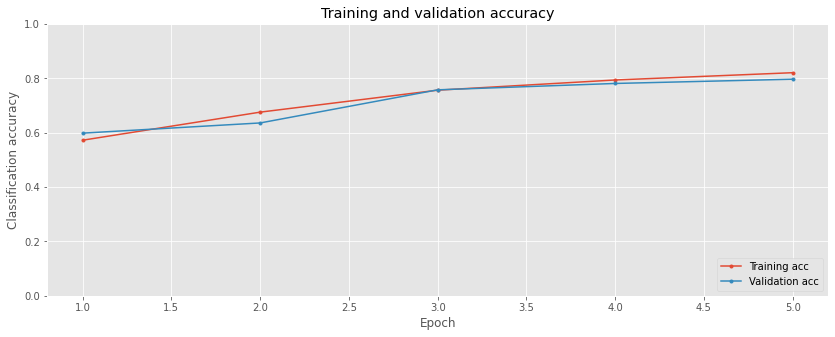

In [57]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [58]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [61]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

DATA_FOLDER = '/content/drive/My Drive/data'

out_v = io.open(path.join(DATA_FOLDER, 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join(DATA_FOLDER, 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_index.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [ ]:
# Create a SimpleRNN layer and test it



In [ ]:
# Note that only the final cell output is returned



#### Load and transform the IMDB review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset




In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()



#### Create a recurrent neural network model

In [ ]:
# Get the maximum index value



In [ ]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.



#### Compile and fit the model

In [ ]:
# Compile the model with binary cross-entropy loss



In [ ]:
# Fit the model and save its training history



#### Plot learning curves

In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### Make predictions with the model

In [ ]:
# View the first test data example sentence
# (invert the word index)



In [ ]:
# Get the model prediction using model.predict()



In [ ]:
# Get the corresponding label



---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [ ]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [ ]:
# Load the dataset



In [ ]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [ ]:
# Get the word index using get_imdb_word_index()



#### Build stacked and bidirectional recurrent models

In [ ]:
# Get the maximum index value and specify an embedding dimension



In [ ]:
# Using Sequential, build a stacked LSTM model via return_sequences=True



In [ ]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'



In [ ]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer



#### Compile and fit the model

In [ ]:
# Compile the model



In [ ]:
# Train the model, saving its history



In [ ]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);